In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 18 01:41:53 2020

@author: joygu
"""
# import libraries
import pandas as pd
import tensorflow as tf
from IPython.display import Audio
import os
import matplotlib.pyplot as plt
import numpy as np
import librosa
import ast
#import tensorflow_io as tfio
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import csv

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold


#import seaborn as sns
#keras.backend.clear_session()
#tf.random.set_seed(42)
#np.random.seed(42)
#%%
# path to the small directory
SMALL_AUDIO_DIR = '/Users/joygu/Documents/summer2020/isye6740/project/music-genre-classification-master/data/fma_small/'
#'data/fma_small/'

# function to get the paths to all the songs in the small dataset
def audio_paths(AUDIO_DIR):
    AUDIO_PATHS = []
    # iterate through all the directories with songs in them
    for path in [os.path.join(SMALL_AUDIO_DIR, p) 
                 for p in os.listdir(SMALL_AUDIO_DIR) 
                 if not (p.endswith('checksums') or p.endswith('.txt') or p.endswith('.DS_Store'))]:
        # add all songs to the list
        AUDIO_PATHS = AUDIO_PATHS + [os.path.join(path, track) for track in os.listdir(path)]
    
    return AUDIO_PATHS

# store all the small paths
SMALL_PATHS = audio_paths(SMALL_AUDIO_DIR)
test_id=[float(SMALL_PATHS[z].split('/')[-1][:-4]) for z in range(len(SMALL_PATHS))]
print(len(SMALL_PATHS))
#%% read feature
#small_tracks_genre = track_genre_information(GENRE_PATH, TRACKS_PATH, SMALL_PATHS, subset)
# visualize the first few rows to confirm each file path has an associated genre
#print(small_tracks_genre.head())
FEATURE_PATH = 'data/fma_metadata/features.csv'
features = []
trackid = []
heads=[]
i=1
with open(FEATURE_PATH) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if i<5:
            readhead=row
            heads.append(readhead)
        else:    
                entry = [float(x) for x in row]
                trackid.append(entry[0])
                features.append(entry[1:])
        i=i+1

8000


In [2]:

# %%tracks

TRACKS_PATH = '/Users/joygu/Documents/summer2020/isye6740/project/music-genre-classification-master/data/fma_metadata/tracks.csv'
tracks = []
trackid_t=[]
heads2=[]
i=1
rawdata = []
with open(TRACKS_PATH) as csvfile:
    readCSV1 = csv.reader(csvfile, delimiter=',')
    for row in readCSV1:
        if i<4:
            readhead=row
            heads2.append(readhead)
        else:    
            readentry = [x for x in row]#[float(x) for x in row]
            rawdata.append(readentry)
            trackid_t.append(float(readentry[0]))
            tracks.append(readentry[40])
        i=i+1

In [5]:
#Creat a mask where data is assigned to a catagory
msk = [(el!='') for el in tracks]

index=np.searchsorted(trackid_t,test_id)



features = np.array(features)
#let new feature array equals to all data that have catagory
#features_new  = features[msk]
features_new = features[index]

tracks_new=[tracks[index[small]] for small in range(len(index))]
# label each catagory with numbers
le = LabelEncoder()
genre_id = le.fit_transform(tracks_new)
classes=list(le.classes_)
#let new genreid array equals to all data that have catagory
#genre_id_new  = genre_id[msk]
#genre_id_new = genre_id
'''
jazmsk = [(el==11) for el in genre_id_new]
jazz_lable = np.zeros(2000)
jazz_lable[jazmsk]=1
'''
print('training start') 

training start


In [4]:
#%% find hyperparameter for knn
test_label = genre_id
neighb=np.arange(1,100,5)
accuracy=[]
kf = KFold(n_splits=5, random_state=2, shuffle=True)
for neigh in np.arange(1,100,5):
    clf = KNeighborsClassifier(n_neighbors=neigh)
    acc_temp = []
    for train, test in kf.split(features_new):
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = features_new[train], features_new[test]
        y_train, y_test = test_label[train], test_label[test]
        clf.fit(x_train, y_train)
        y_pred = np.array(clf.predict(x_test),dtype=np.int)
        y_expected = np.array(y_test,dtype=np.int)
        acc_temp.append(np.sum(y_pred==y_expected)/y_expected.shape[0])
    accuracy.append(np.mean(acc_temp))

plt.scatter(neighb, accuracy)
plt.plot(neighb, accuracy)
#plt.xlim((0, 0.03))
#plt.ylim((0.2620, 0.26222))
plt.xlabel('No. neighber')
plt.ylabel('Accuracy')
plt.show()
acc_rank = np.argsort(accuracy)
neigh = 21
print('Accuracy reaches maximum at no. of neighbour  = %f' % neigh)


NameError: name 'genre_id' is not defined

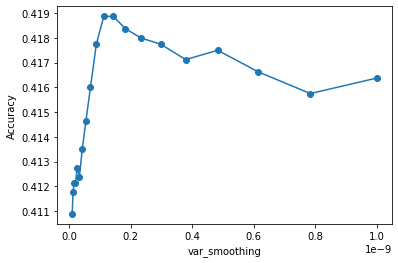

Accuracy reaches maximum at var_smoothing  = 0.00000000011


In [6]:

#%% find hyperparameter for guassian
test_label = genre_id
var_s=[]
accuracy=[]
kf = KFold(n_splits=5, random_state=2, shuffle=True)
for var_S in np.logspace(-11,-9,20):
    clf = GaussianNB(var_smoothing=var_S)
    acc_temp = []
    for train, test in kf.split(features_new):
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = features_new[train], features_new[test]
        y_train, y_test = test_label[train], test_label[test]
        clf.fit(x_train, y_train)
        y_pred = np.array(clf.predict(x_test),dtype=np.int)
        y_expected = np.array(y_test,dtype=np.int)
        acc_temp.append(np.sum(y_pred==y_expected)/y_expected.shape[0])
    accuracy.append(np.mean(acc_temp))
    var_s.append(var_S)
plt.scatter(var_s, accuracy)
plt.plot(var_s, accuracy)
#plt.xlim((0, 0.03))
#plt.ylim((0.2620, 0.26222))
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.show()
acc_rank = np.argsort(accuracy)
var_s = var_s[acc_rank[-1]]
print('Accuracy reaches maximum at var_smoothing  = %.11f' % var_s)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#%% find hyperparameter for logistic regression
test_label = genre_id
slover=[ 'lbfgs', 'liblinear', 'sag', 'saga']
accuracy=[]
kf = KFold(n_splits=5, random_state=2, shuffle=True)
for solv in range(4):
    print(str(slover[solv]))
    clf = LogisticRegression(solver = slover[solv],max_iter=500)
    acc_temp = []
    for train, test in kf.split(features_new):
        print('cv ongoing')
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = features_new[train], features_new[test]
        y_train, y_test = test_label[train], test_label[test]
        clf.fit(x_train, y_train)
        y_pred = np.array(clf.predict(x_test),dtype=np.int)
        y_expected = np.array(y_test,dtype=np.int)
        acc_temp.append(np.sum(y_pred==y_expected)/y_expected.shape[0])
    accuracy.append(np.mean(acc_temp))
plt.plot(slover, accuracy,'o')
#plt.xlim((0, 0.03))
#plt.ylim((0.2620, 0.26222))
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.show()
acc_rank = np.argsort(accuracy)
solv = slover[acc_rank[-1]]
print('Accuracy reaches maximum at no. of neighbour  = ' + str(solv))


In [ ]:

#%% find hyperparameter for Neural Network
test_label = genre_id
layer = []
accuracy=[]
kf = KFold(n_splits=5, random_state=2, shuffle=True)
for lay in np.arange(5,105,10):
    clf = MLPClassifier( activation='logistic', max_iter=1000, hidden_layer_sizes=(lay,2), random_state=1)
    acc_temp = []
    print(lay)
    for train, test in kf.split(features_new):
        #print("TRAIN:", train_index, "TEST:", test_index)
        print('cv ongoing')
        x_train, x_test = features_new[train], features_new[test]
        y_train, y_test = test_label[train], test_label[test]
        clf.fit(x_train, y_train)
        y_pred = np.array(clf.predict(x_test),dtype=np.int)
        y_expected = np.array(y_test,dtype=np.int)
        acc_temp.append(np.sum(y_pred==y_expected)/y_expected.shape[0])
    accuracy.append(np.mean(acc_temp))
    layer.append(lay)
plt.scatter(layer, accuracy)
plt.plot(layer, accuracy)
#plt.xlim((0, 0.03))
#plt.ylim((0.2620, 0.26222))
plt.xlabel('Number of neuron in first hidden layer')
plt.ylabel('Accuracy')
plt.show()
acc_rank = np.argsort(accuracy)
layer = layer[acc_rank[-1]]
print('Accuracy reaches maximum at var_smoothing  = %.11f' % layer)


In [ ]:
#%% find hyperparameter for svm
test_label = genre_id
kernel_s=[ 'linear', 'poly', 'rbf', 'sigmoid']
accuracy=[]
kf = KFold(n_splits=5, random_state=2, shuffle=True)
for solv in range(5):
    print(str(kernel_s[solv]))
    clf = SVC(kernel = kernel_s[solv],max_iter=2000)
    acc_temp = []
    for train, test in kf.split(features_new):
        print('cv ongoing')
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = features_new[train], features_new[test]
        y_train, y_test = test_label[train], test_label[test]
        clf.fit(x_train, y_train)
        y_pred = np.array(clf.predict(x_test),dtype=np.int)
        y_expected = np.array(y_test,dtype=np.int)
        acc_temp.append(np.sum(y_pred==y_expected)/y_expected.shape[0])
    accuracy.append(np.mean(acc_temp))
plt.plot(kernel_s, accuracy,'o')
#plt.xlim((0, 0.03))
#plt.ylim((0.2620, 0.26222))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()
acc_rank = np.argsort(accuracy)
kernel_s = 'poly'
print('Accuracy reaches maximum at no. of neighbour  = ' + str(kernel_s))


In [ ]:
# %%
test_label = genre_id
#following code modified using http://scipy-lectures.org/packages/scikit-learn/
#X_train, X_test, y_train, y_test = train_test_split(features_new,genre_id_new,test_size=0.20,random_state=3)
kf = KFold(n_splits=5, random_state=2, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(features_new,jazz_lable,test_size=0.20,random_state=3)
T_err =[]
for Model in [GaussianNB, KNeighborsClassifier,LogisticRegression,SVC, MLPClassifier]:
#for Model in [SVC, MLPClassifier]:
    err = []
    print(Model)
    for train, test in kf.split(features_new):
        print('cv ongoing')
        x_train, x_test = features_new[train], features_new[test]
        y_train, y_test = test_label[train], test_label[test]
        #gaussian 0.34~ knn 0.45~ logistic default converge error? SVC 0.4775~ NN 0.455
        if Model == GaussianNB:
           clf =  GaussianNB(var_smoothing=1.29e-10)
        elif Model == LogisticRegression:
            #clf =  LogisticRegression(solver='liblinear')
            clf =  LogisticRegression(solver='liblinear',max_iter=2000)#max_iter=5000)
        elif Model == KNeighborsClassifier:
            clf = Model(n_neighbors=21)
        elif Model == MLPClassifier:
           clf =  Model( activation='logistic', max_iter=1000, hidden_layer_sizes=(layer,2), random_state=1)
        elif Model == SVC:
            clf = Model(kernel = kernel_s,max_iter=2000)
            #clf = Model(kernel='linear', C=1.0,max_iter=1000)
        clf.fit(x_train, y_train)
        y_pred = np.array(clf.predict(x_test),dtype=np.int)
        y_expected = np.array(y_test,dtype=np.int)
        err.append(np.sum(y_pred==y_expected)/y_expected.shape[0])
    T_err.append(np.mean(err))
        
'''
    corr = np.sum(y_pred==y_expected)/y_expected.shape[0]
    print('%s: %s' % (Model.__name__, corr ))  
'''
plt.plot(['GaussianNB','KNN','LogisticRegression','SVC','MLPClassifier'],T_err,'o')
